In [1]:
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

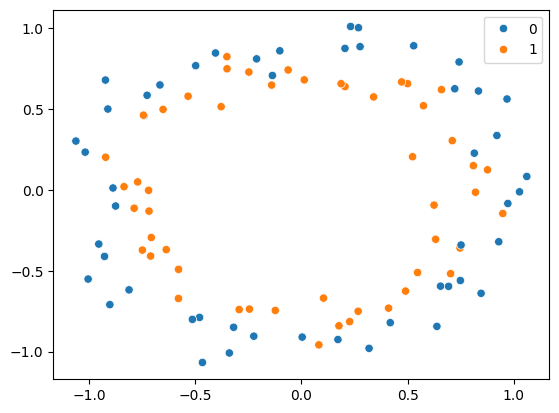

In [6]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [8]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

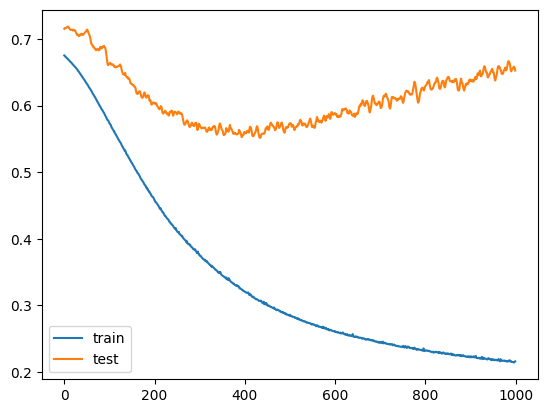

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


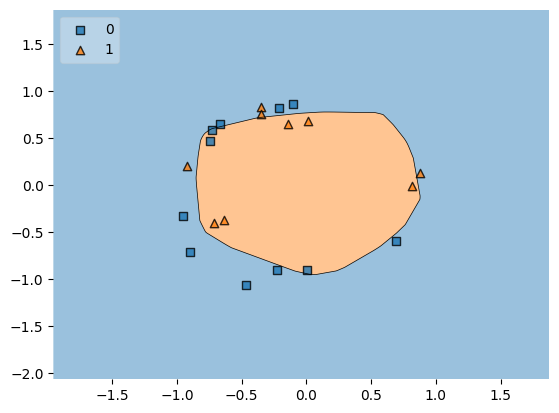

In [21]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# EARLY-STOPPING

In [22]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [25]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=800, callbacks=callback)

Epoch 1/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.5000 - loss: 0.6972 - val_accuracy: 0.5500 - val_loss: 0.6999
Epoch 2/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4875 - loss: 0.6949 - val_accuracy: 0.4000 - val_loss: 0.7001
Epoch 3/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4625 - loss: 0.6922 - val_accuracy: 0.3500 - val_loss: 0.7029
Epoch 4/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5250 - loss: 0.6909 - val_accuracy: 0.4000 - val_loss: 0.7059
Epoch 5/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5250 - loss: 0.6898 - val_accuracy: 0.4000 - val_loss: 0.7065
Epoch 6/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5250 - loss: 0.6881 - val_accuracy: 0.4500 - val_loss: 0.7072
Epoch 7/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5250 - loss: 0.6870 - val_accuracy: 0.4500 - val_loss: 0.7078
Epoch 8/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5375 - loss: 0.6861 - val_accuracy: 0.4500 - val_loss

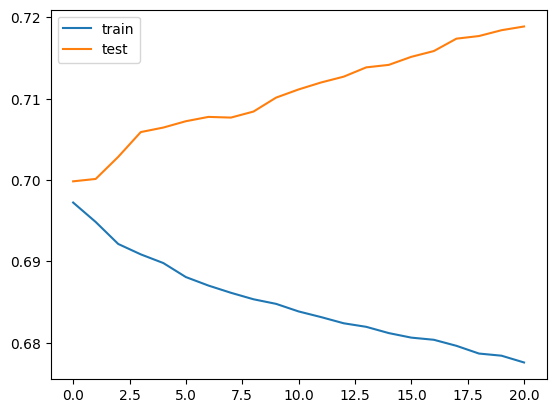

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()